In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
pd.set_option('precision', 3)

# Data Visualisation Libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!pip install seaborn --upgrade
import seaborn as sns
sns.set_style('darkgrid')
import sklearn

# Statistics
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

print('✔️ Libraries Imported!')

C:\Users\sarah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


Requirement already up-to-date: seaborn in c:\users\sarah\anaconda3\lib\site-packages (0.12.2)


ModuleNotFoundError: No module named 'scikitplot'

In [2]:
#conda install -c conda-forge scikit-plot

In [4]:
df = pd.read_csv("C:/BI/CIND 820/Files/Churn_Modelling.csv", encoding = 'utf-8')

print('✔️ Dataset Imported Successfully!\n')
print('It contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))


✔️ Dataset Imported Successfully!

It contains 10000 rows and 14 columns.


In [5]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
#!pip install pandas-profiling
#import sys
#!{sys.executable} -m pip install pandas-profiling

In [5]:
from pandas_profiling import ProfileReport
ProfileReport(df) #to display the report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df.describe().T

count        mean        std     min       25%         50%  \
CreditScore      10000.0     650.529     96.653  350.00    584.00     652.000   
Age              10000.0      38.922     10.488   18.00     32.00      37.000   
Tenure           10000.0       5.013      2.892    0.00      3.00       5.000   
Balance          10000.0   76485.889  62397.405    0.00      0.00   97198.540   
NumOfProducts    10000.0       1.530      0.582    1.00      1.00       1.000   
HasCrCard        10000.0       0.706      0.456    0.00      0.00       1.000   
IsActiveMember   10000.0       0.515      0.500    0.00      0.00       1.000   
EstimatedSalary  10000.0  100090.240  57510.493   11.58  51002.11  100193.915   
Exited           10000.0       0.204      0.403    0.00      0.00       0.000   

                        75%        max  
CreditScore         718.000     850.00  
Age                  44.000      92.00  
Tenure                7.000      10.00  
Balance          127644.240  250898.09  
NumOfProducts         2.000       4.00  
HasCrCard             1.000       1.00  
IsActiveMember        1.000       1.00  
EstimatedSalary  149388.247  199992.48  
Exited                0.000       1.00

In [9]:
#spliting our dataset into a train and test
random_state = 42
train_df, test_df = train_test_split(df, test_size=0.2, random_state=random_state)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print('Train set: {} rows x {} columns'.format(train_df.shape[0],
                                               train_df.shape[1]))
print(' Test set: {} rows x {} columns'.format(test_df.shape[0],
                                               test_df.shape[1]))

Train set: 8000 rows x 11 columns
 Test set: 2000 rows x 11 columns


In [10]:
def plot_continuous(feature):
    '''Plot a histogram and boxplot for the churned and retained distributions for the specified feature.'''
    df_func = train_df.copy()
    df_func['Exited'] = df_func['Exited'].astype('category')

    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(9, 7),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})

    for df, color, label in zip([df_retained, df_churned], colors, ['Retained', 'Churned']):
        sns.histplot(data=df,
                     x=feature,
                     bins=15,
                     color=color,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature, y='Exited', data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['Retained', 'Churned'])

    plt.tight_layout();



In [11]:
def plot_categorical(feature):
    '''For a categorical feature, plot a seaborn.countplot for the total counts of each category next to a barplot for the churn rate.'''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature,
                  hue='Exited',
                  data=train_df,
                  palette=colors,
                  ax=ax1)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['Retained', 'Churned'])

    sns.barplot(x=feature,
                y='Exited',
                data=train_df,
                palette=colors_cat,
                ax=ax2)
    ax2.set_ylabel('Churn rate')

    if (feature == 'HasCrCard' or feature == 'IsActiveMember'):
        ax1.set_xticklabels(['No', 'Yes'])
        ax2.set_xticklabels(['No', 'Yes'])

    plt.tight_layout();



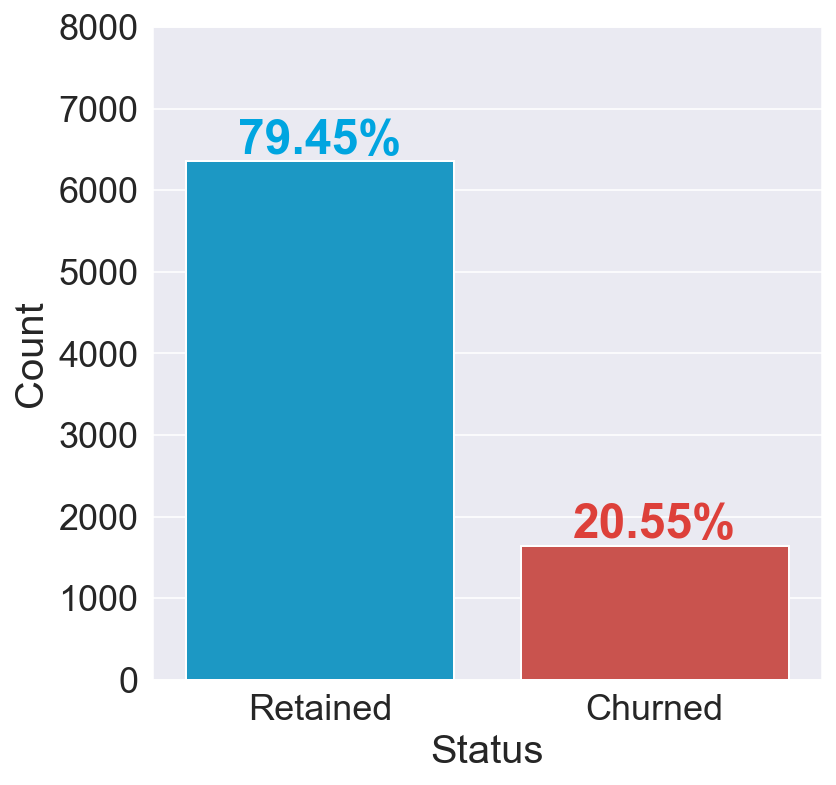

In [14]:
#Exploratory Data Analysis


colors = ['#00A5E0', '#DD403A']
colors_cat = ['#E8907E', '#D5CABD', '#7A6F86', '#C34A36', '#B0A8B9', '#845EC2', '#8f9aaa', '#FFB86F', '#63BAAA', '#9D88B3', '#38c4e3']
colors_comp = ['steelblue', 'seagreen', 'black', 'darkorange', 'purple', 'firebrick', 'slategrey']

random_state = 42
scoring_metric = 'recall'
comparison_dict, comparison_test_dict = {}, {}

font_size = 20
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2


fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='Exited', data=train_df, palette=colors, ax=ax)

for index, value in enumerate(train_df['Exited'].value_counts()):
    label = '{}%'.format(round((value / train_df['Exited'].shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center',
                color=colors[index],
                fontweight='bold',
                size=font_size + 4)

ax.set_xticklabels(['Retained', 'Churned'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')
ax.set_ylim([0, 8000]);

In [15]:
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

print('Continuous: ', ', '.join(continuous))
print('Categorical: ', ', '.join(categorical))

Continuous:  Age, CreditScore, Balance, EstimatedSalary
Categorical:  Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember


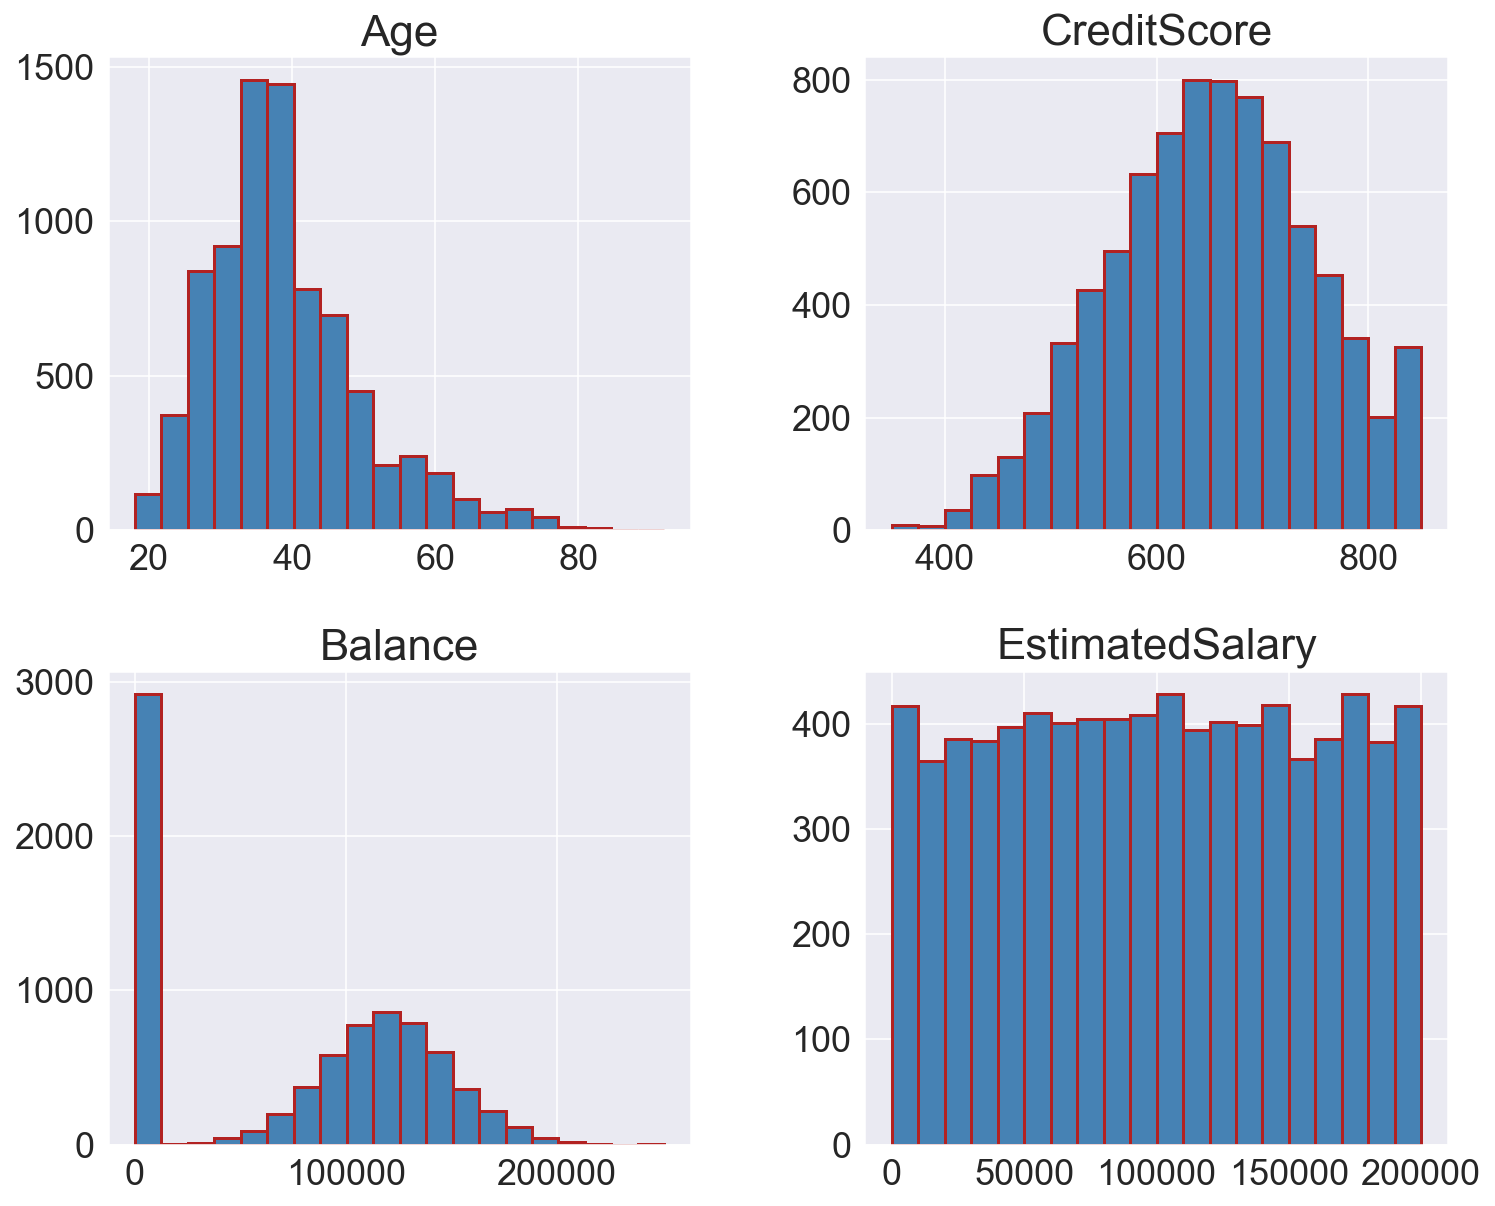

In [16]:
train_df[continuous].hist(figsize=(12, 10),
                          bins=20,
                          layout=(2, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);

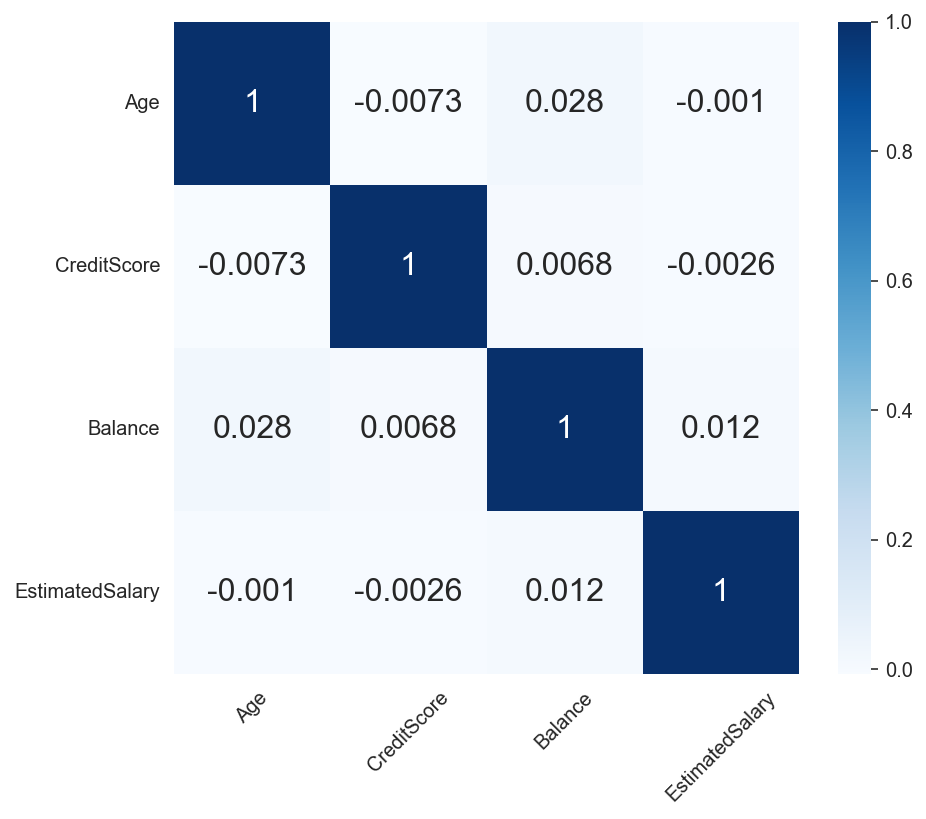

In [9]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(train_df[continuous].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            cmap='Blues',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);


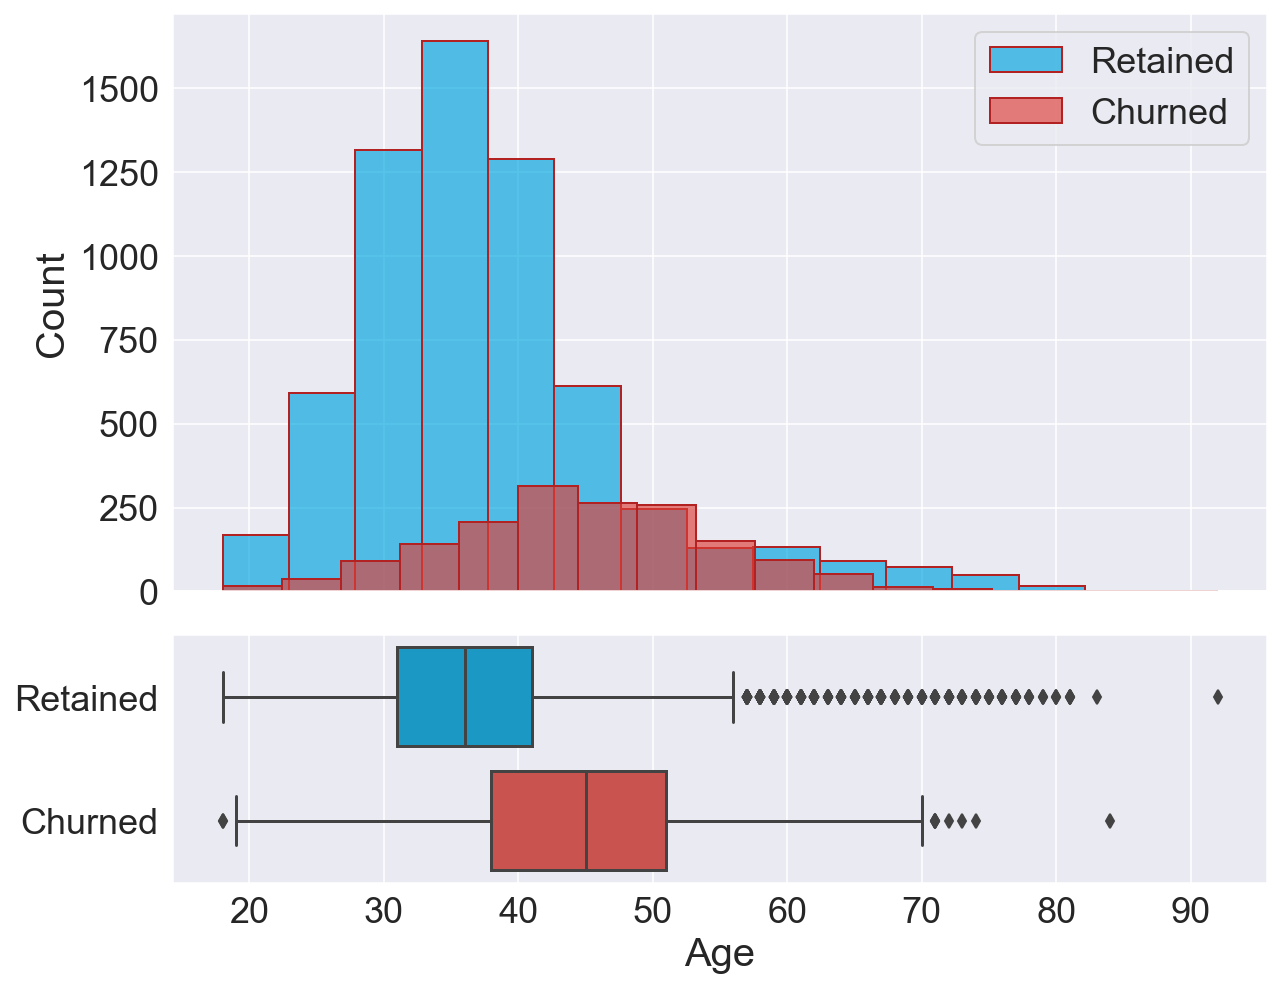

In [17]:
df_churned = train_df[train_df['Exited'] == 1]
df_retained = train_df[train_df['Exited'] == 0]

plot_continuous('Age')


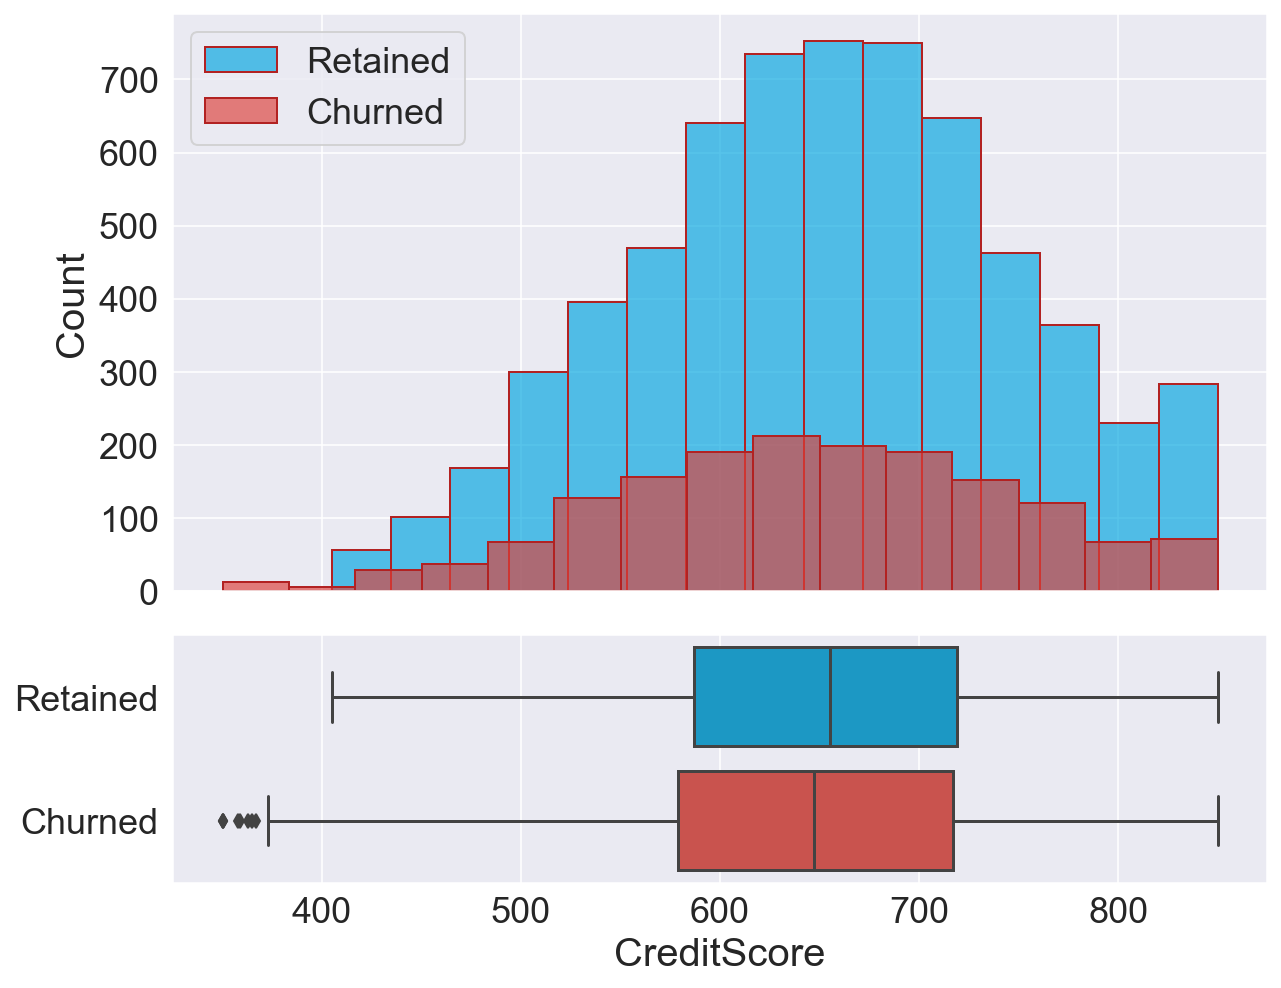

In [18]:
plot_continuous('CreditScore')

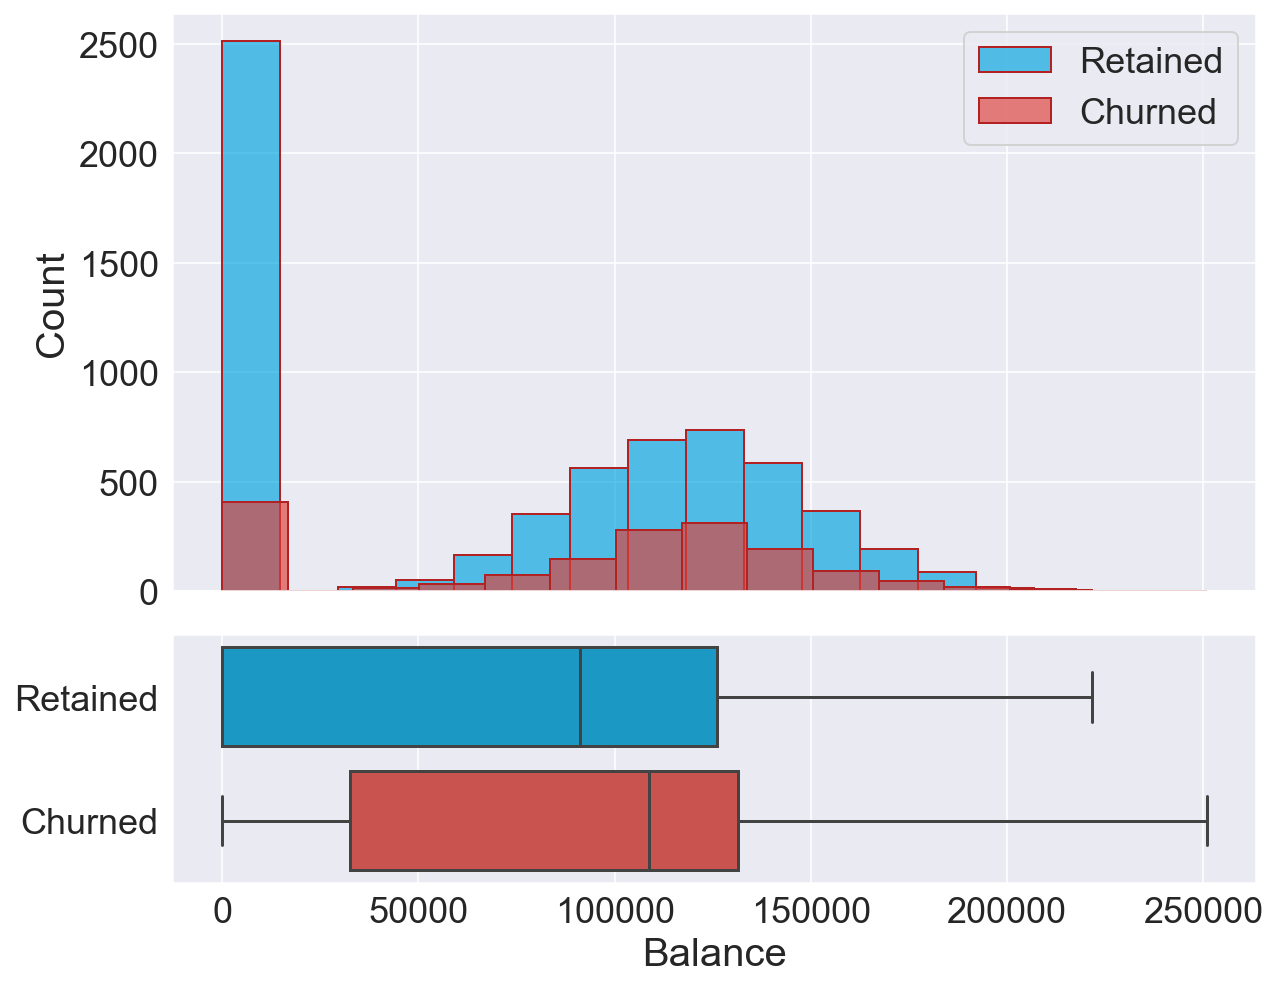

In [19]:
plot_continuous('Balance')

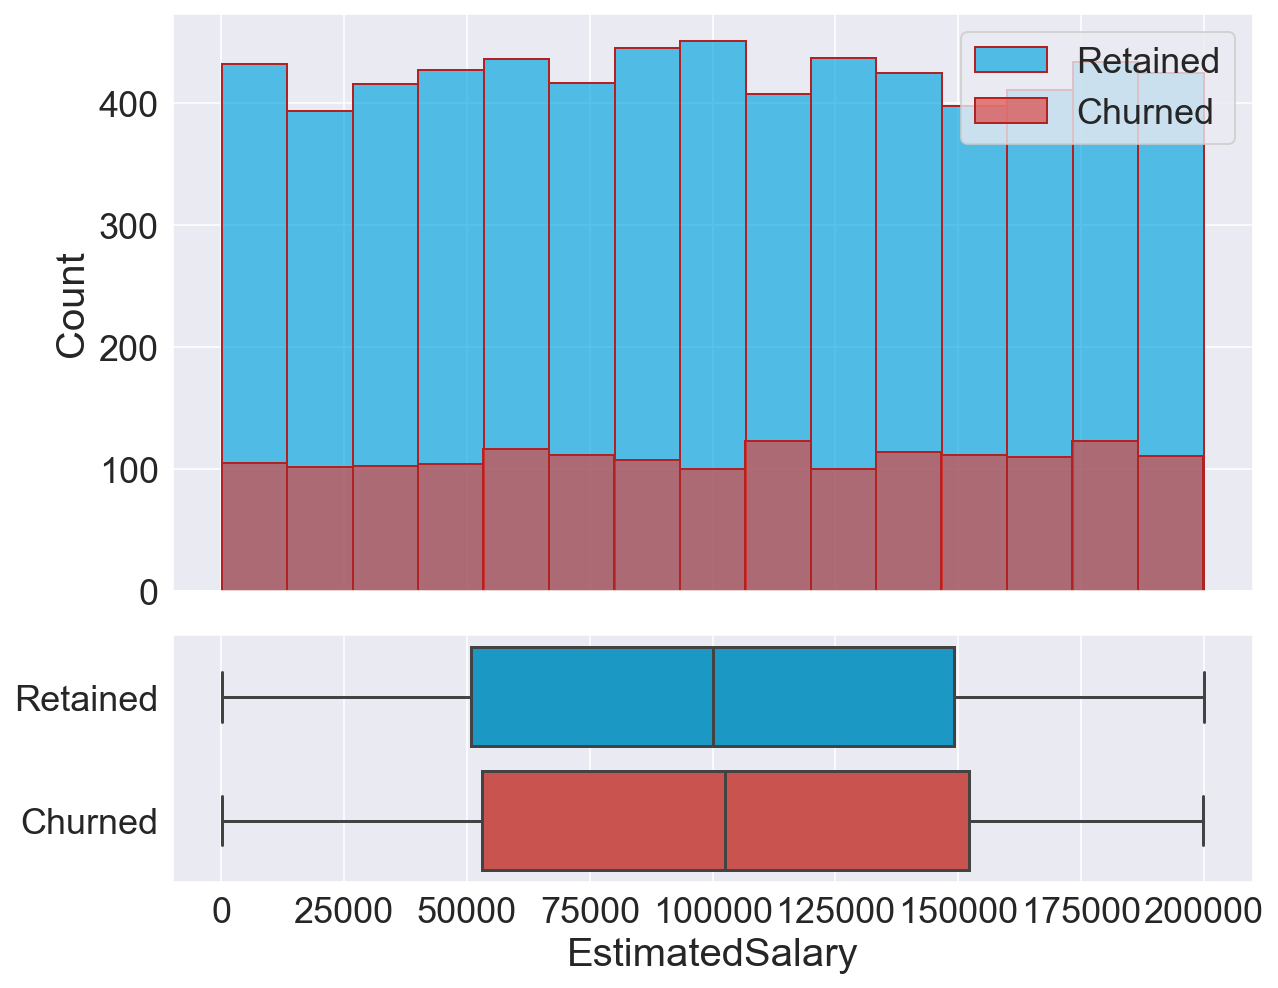

In [20]:
plot_continuous('EstimatedSalary')

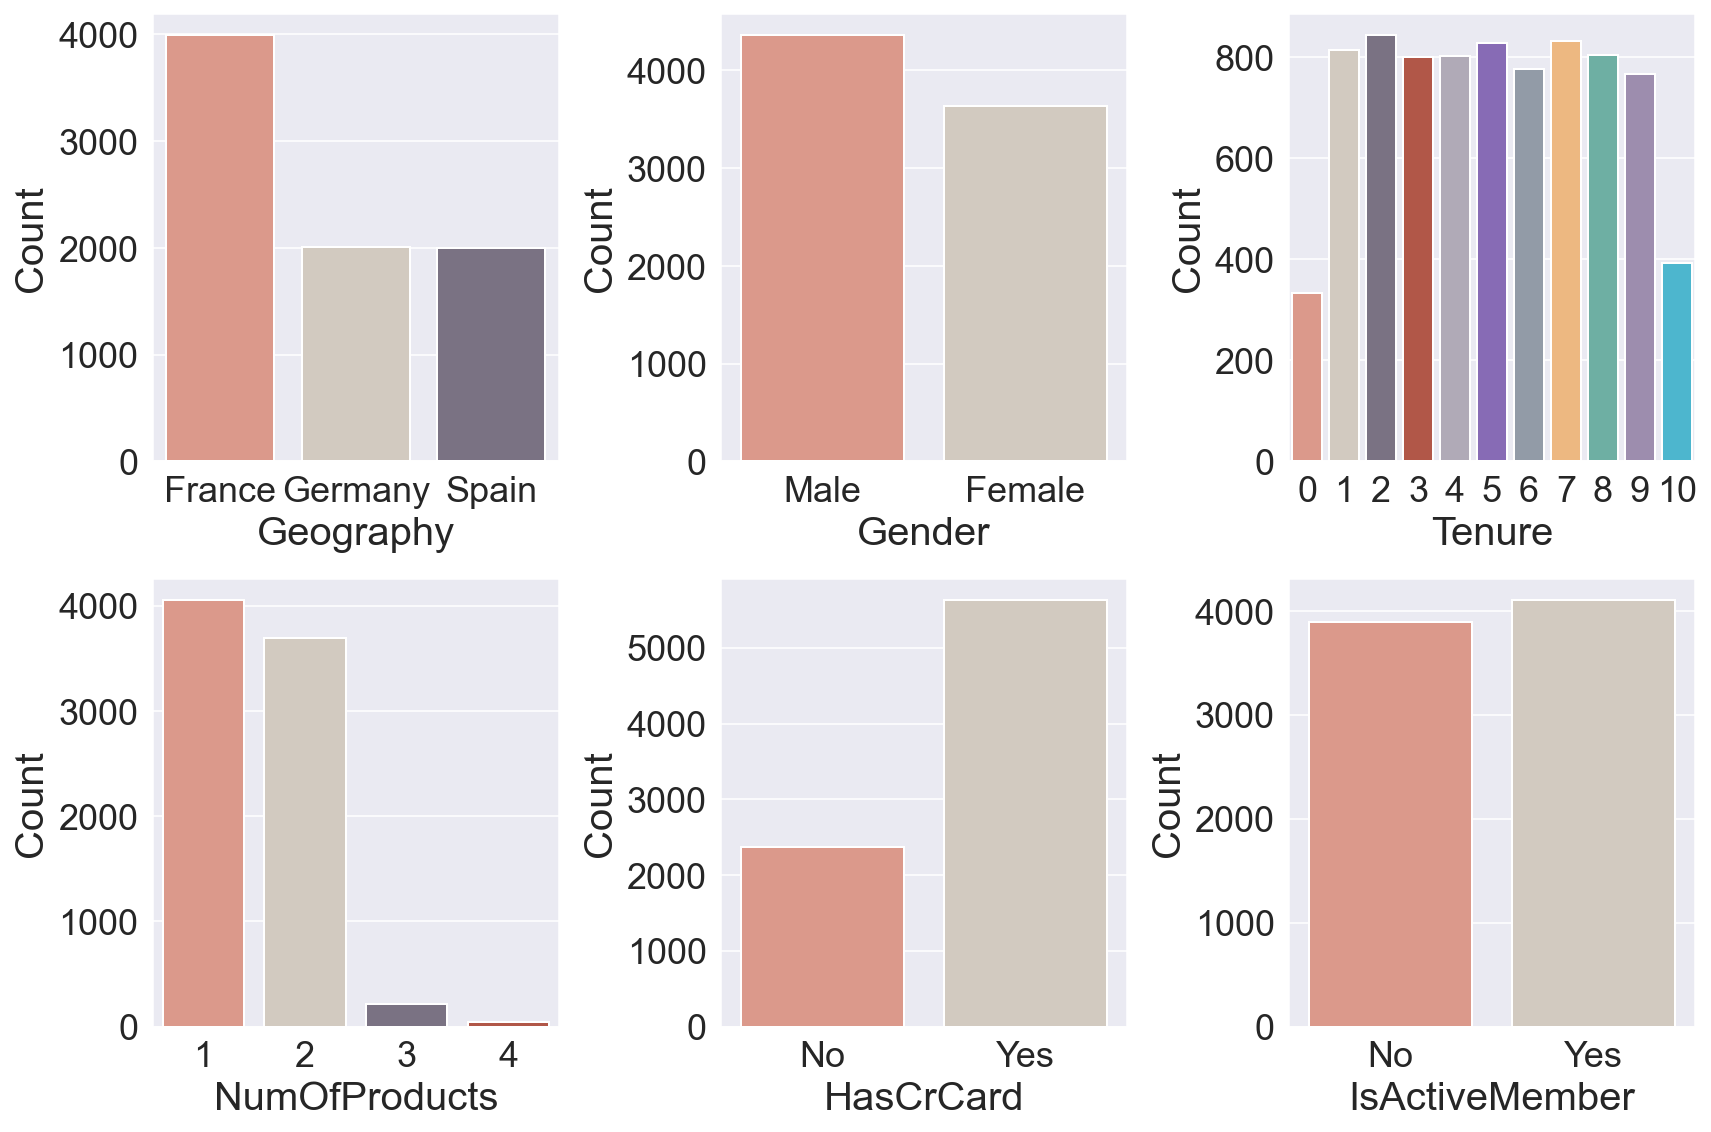

In [21]:
df_cat = train_df[categorical]

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

for index, column in enumerate(df_cat.columns):

    plt.subplot(2, 3, index + 1)
    sns.countplot(x=column, data=train_df, palette=colors_cat)

    plt.ylabel('Count')
    if (column == 'HasCrCard' or column == 'IsActiveMember'):
        plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout();

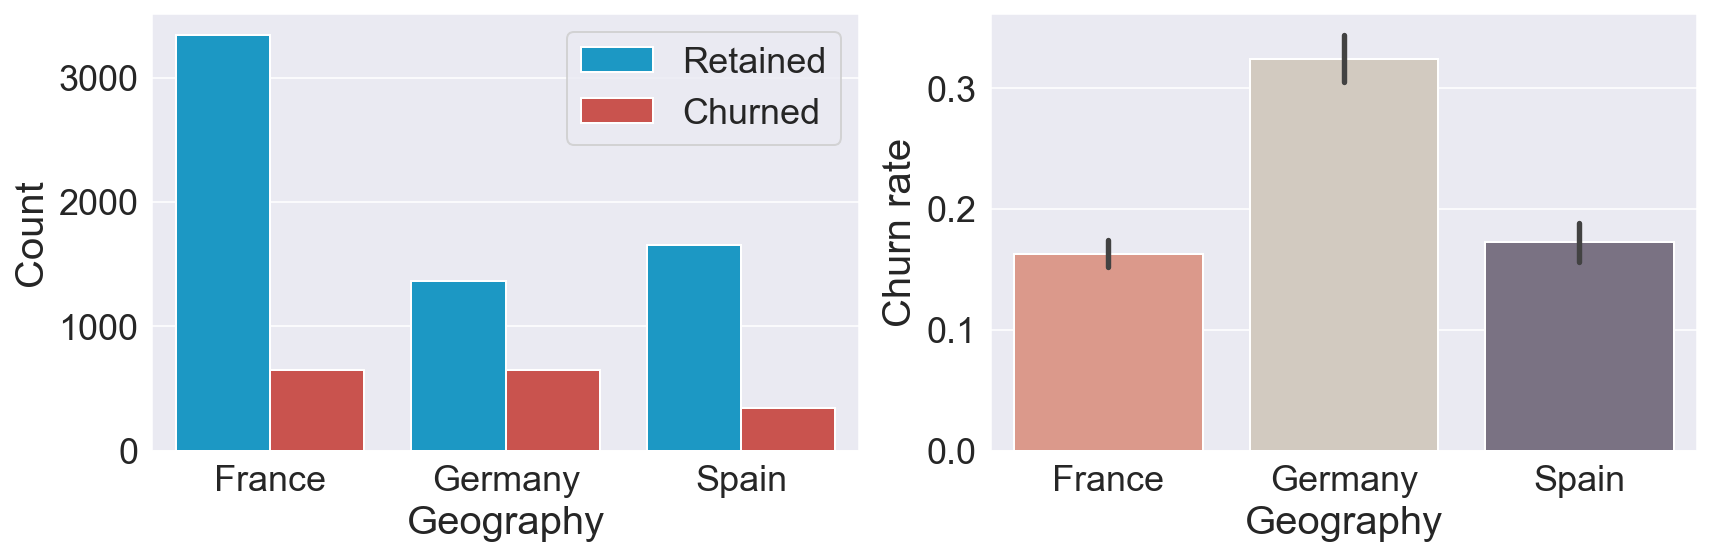

In [22]:
plot_categorical('Geography')

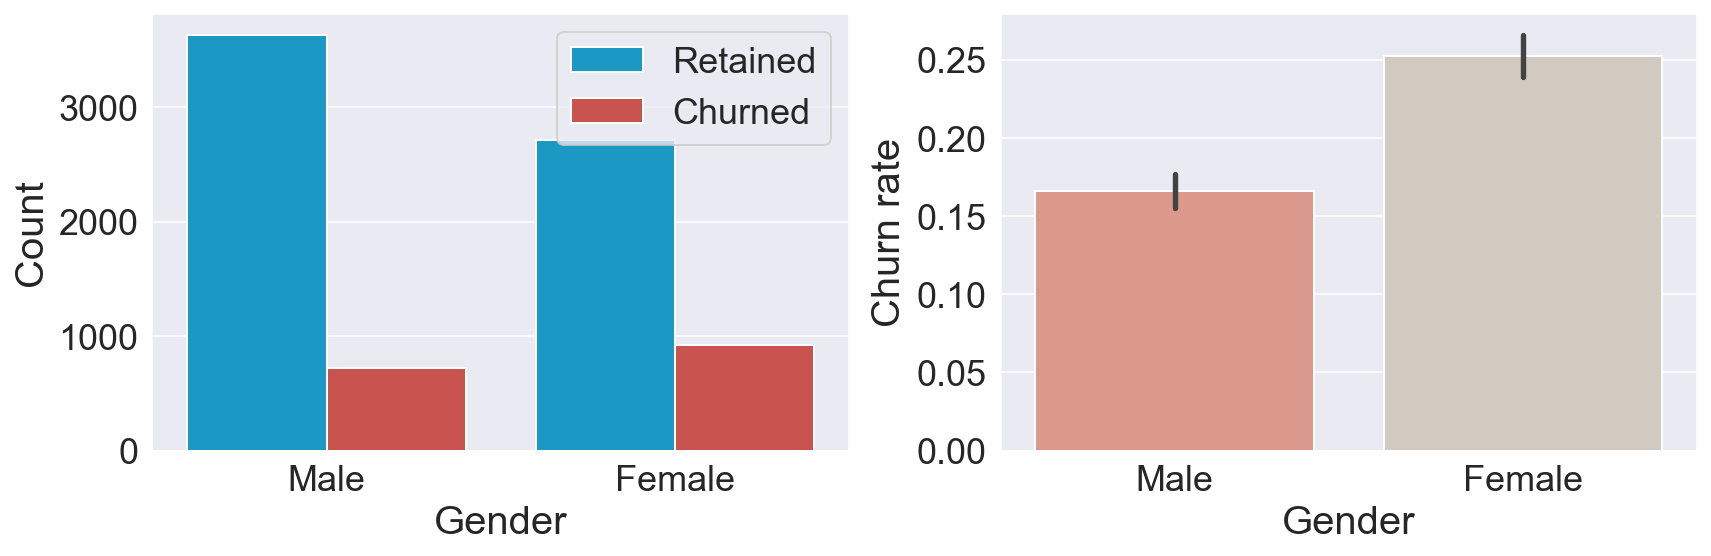

In [23]:
plot_categorical('Gender')

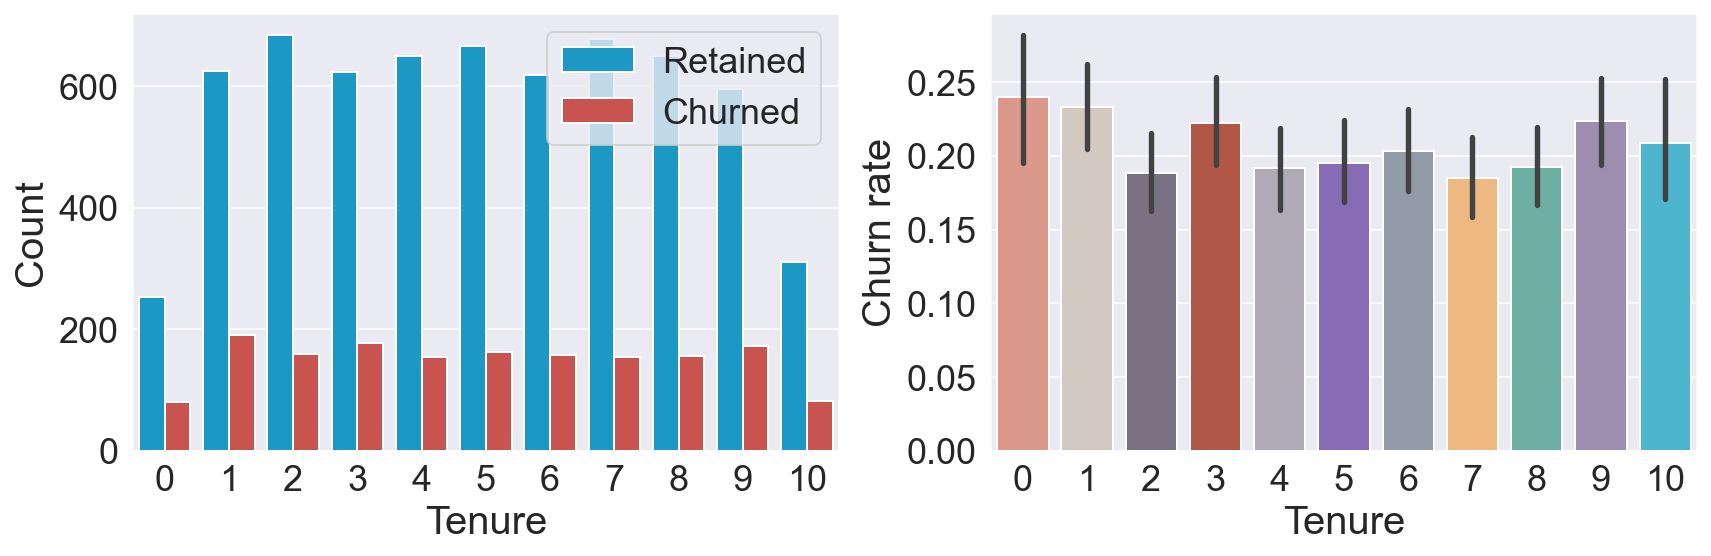

In [24]:
plot_categorical('Tenure')

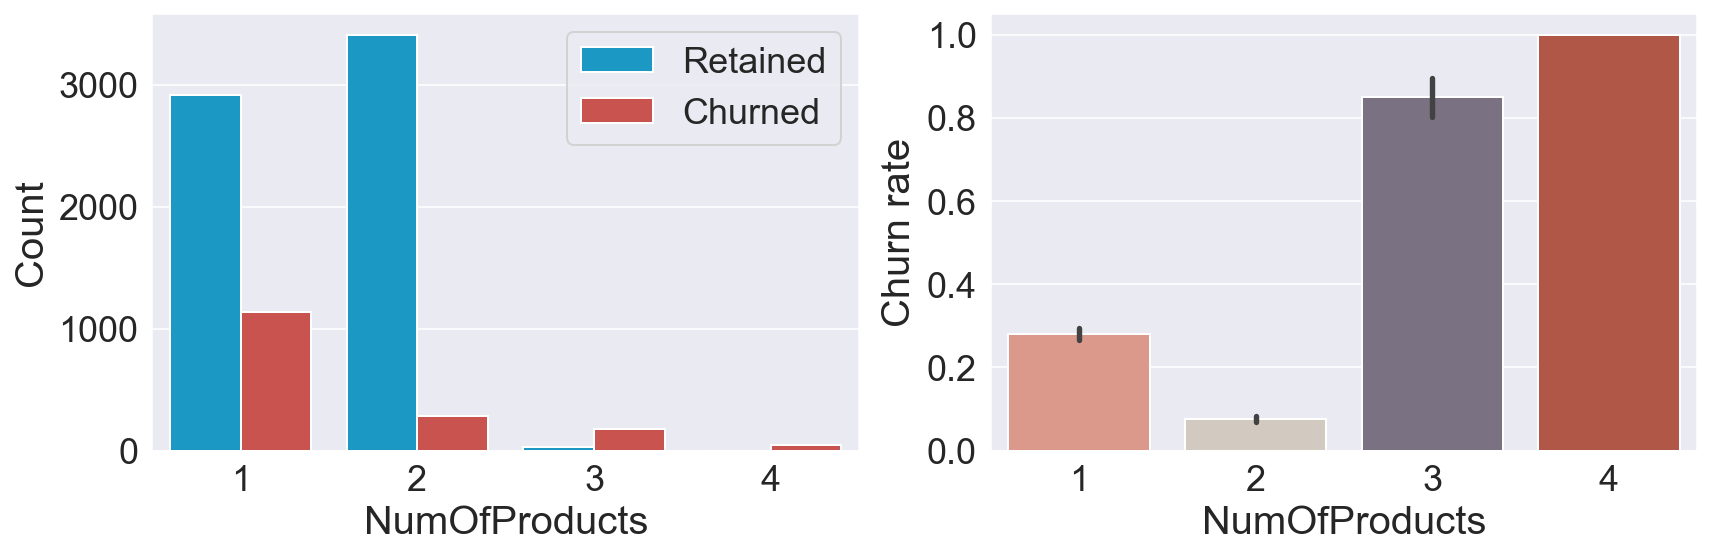

In [25]:
plot_categorical('NumOfProducts')

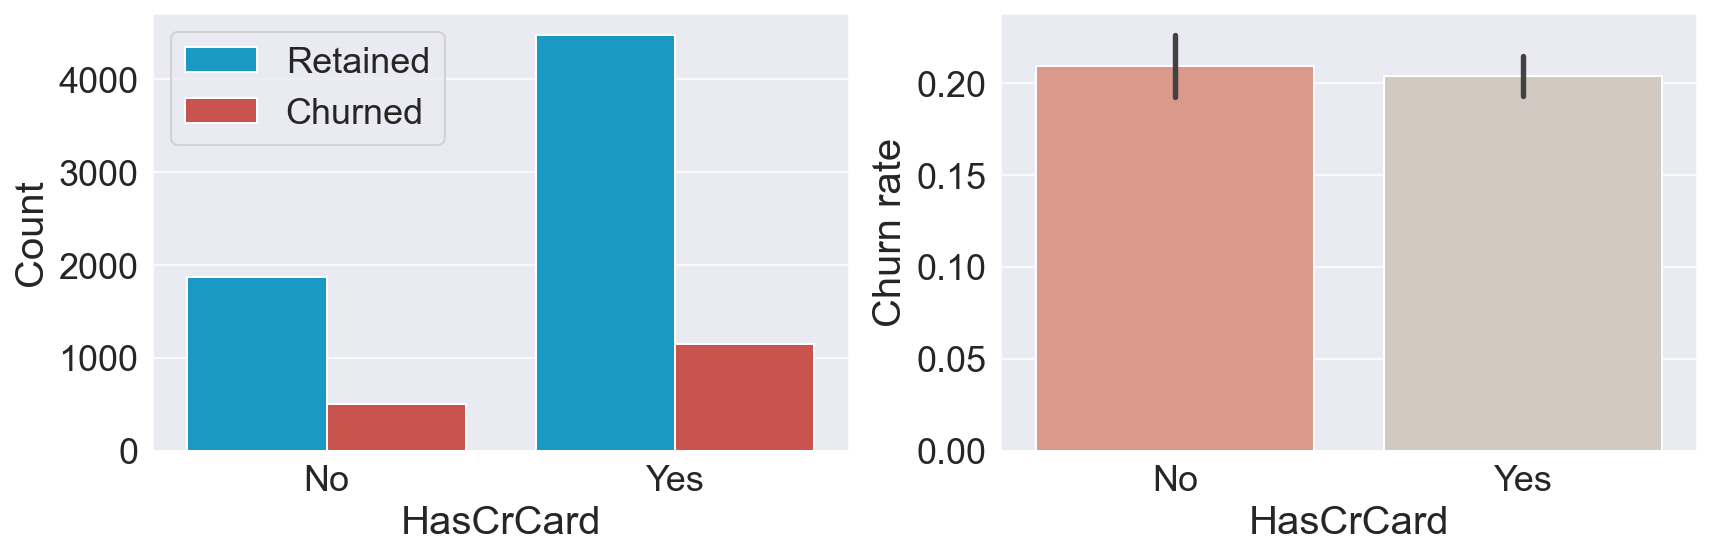

In [26]:
plot_categorical('HasCrCard')

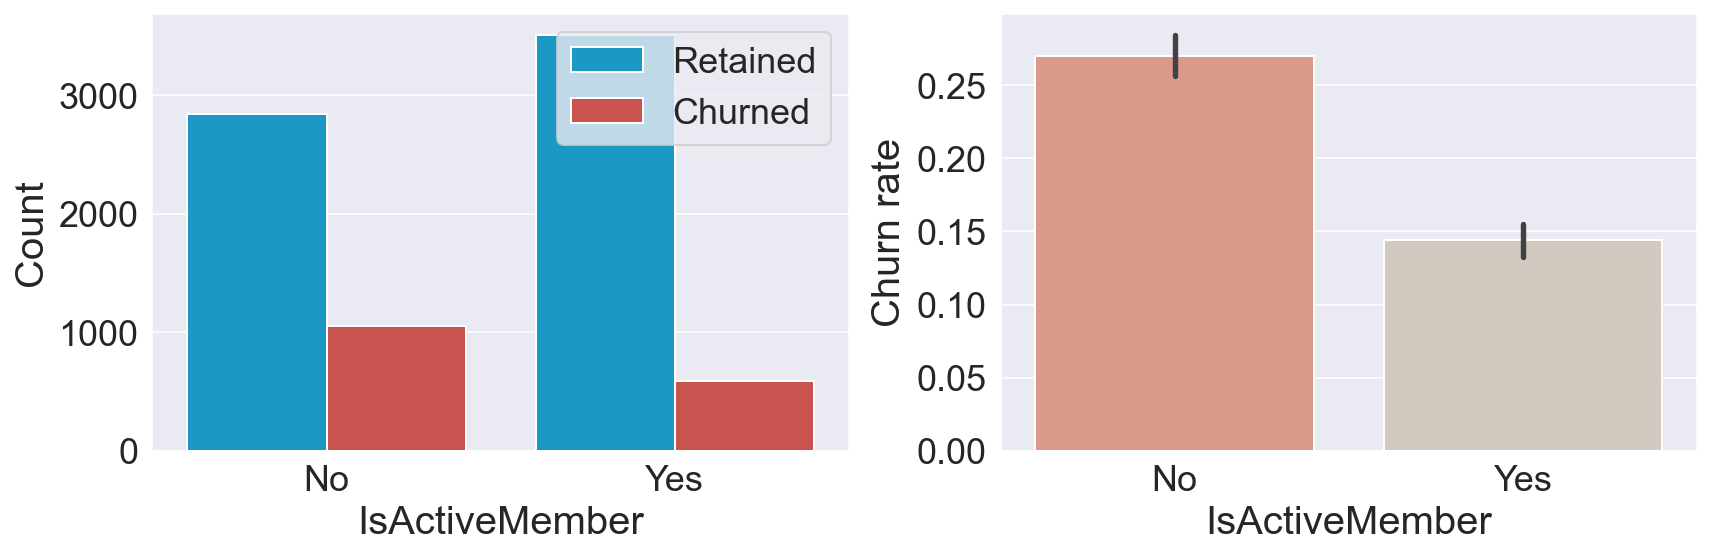

In [27]:
plot_categorical('IsActiveMember')

In [28]:
#features_drop = ['Tenure', 'HasCrCard', 'EstimatedSalary']
#train_df = train_df.drop(features_drop, axis=1)

#print('✔️ Features Dropped!')

In [12]:
 #encoding our categorical attributes

train_df['Gender'] = LabelEncoder().fit_transform(train_df['Gender'])

train_df['Geography'] = train_df['Geography'].map({
    'Germany': 1,
    'Spain': 2,
    'France': 3
})

print('✔️ Features Encoded!')

✔️ Features Encoded!


In [13]:
train_df.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          686          3       1   32       6       0.00              2   
1          632          1       1   42       4  119624.60              2   
2          559          2       1   24       3  114739.92              1   
3          561          3       0   27       9  135637.00              1   
4          517          3       1   56       9  142147.32              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        179093.26       0  
1          1               1        195978.86       0  
2          1               0         85891.02       1  
3          1               0        153080.40       1  
4          0               0         39488.04       1

In [14]:
scaler = StandardScaler()

scl_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure']
train_df[scl_columns] = scaler.fit_transform(train_df[scl_columns])

print('✔️ Features Scaled!')
train_df.head()

✔️ Features Scaled!


CreditScore  Geography  Gender    Age  Tenure  Balance  NumOfProducts  \
0        0.356          3       1 -0.656   0.346   -1.218              2   
1       -0.204          1       1  0.295  -0.348    0.697              2   
2       -0.961          2       1 -1.416  -0.695    0.619              1   
3       -0.941          3       0 -1.131   1.387    0.953              1   
4       -1.397          3       1  1.626   1.387    1.057              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1            1.368       0  
1          1               1            1.661       0  
2          1               0           -0.253       1  
3          1               0            0.915       1  
4          0               0           -1.060       1

In [15]:
y_train = train_df['Exited']
X_train = train_df.drop('Exited', 1)

print('✔️ Sets Created!')

✔️ Sets Created!


In [16]:
y_train.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

In [17]:
train_df.describe()

CreditScore  Geography    Gender        Age     Tenure    Balance  \
count    8.000e+03   8000.000  8000.000  8.000e+03  8.000e+03  8.000e+03   
mean     5.723e-16      2.248     0.545 -2.100e-16 -4.821e-17 -3.513e-16   
std      1.000e+00      0.830     0.498  1.000e+00  1.000e+00  1.000e+00   
min     -3.130e+00      1.000     0.000 -1.987e+00 -1.736e+00 -1.218e+00   
25%     -6.917e-01      1.000     0.000 -6.558e-01 -6.954e-01 -1.218e+00   
50%      1.403e-02      2.000     1.000 -1.804e-01 -1.345e-03  3.257e-01   
75%      6.990e-01      3.000     1.000  4.851e-01  6.927e-01  8.247e-01   
max      2.058e+00      3.000     1.000  5.049e+00  1.734e+00  2.799e+00   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  
count       8000.000   8000.000        8000.000        8.000e+03  8000.000  
mean           1.531      0.704           0.513       -4.496e-18     0.205  
std            0.580      0.457           0.500        1.000e+00     0.404  
min            1.000      0.000           0.000       -1.745e+00     0.000  
25%            1.000      0.000           0.000       -8.531e-01     0.000  
50%            1.000      1.000           1.000        9.811e-04     0.000  
75%            2.000      1.000           1.000        8.548e-01     0.000  
max            4.000      1.000           1.000        1.731e+00     1.000

In [18]:
#Handling imbalanced data-
#over sampling-SMO
over = SMOTE(sampling_strategy='auto', random_state=random_state)
X_train, y_train = over.fit_resample(X_train, y_train)

y_train.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

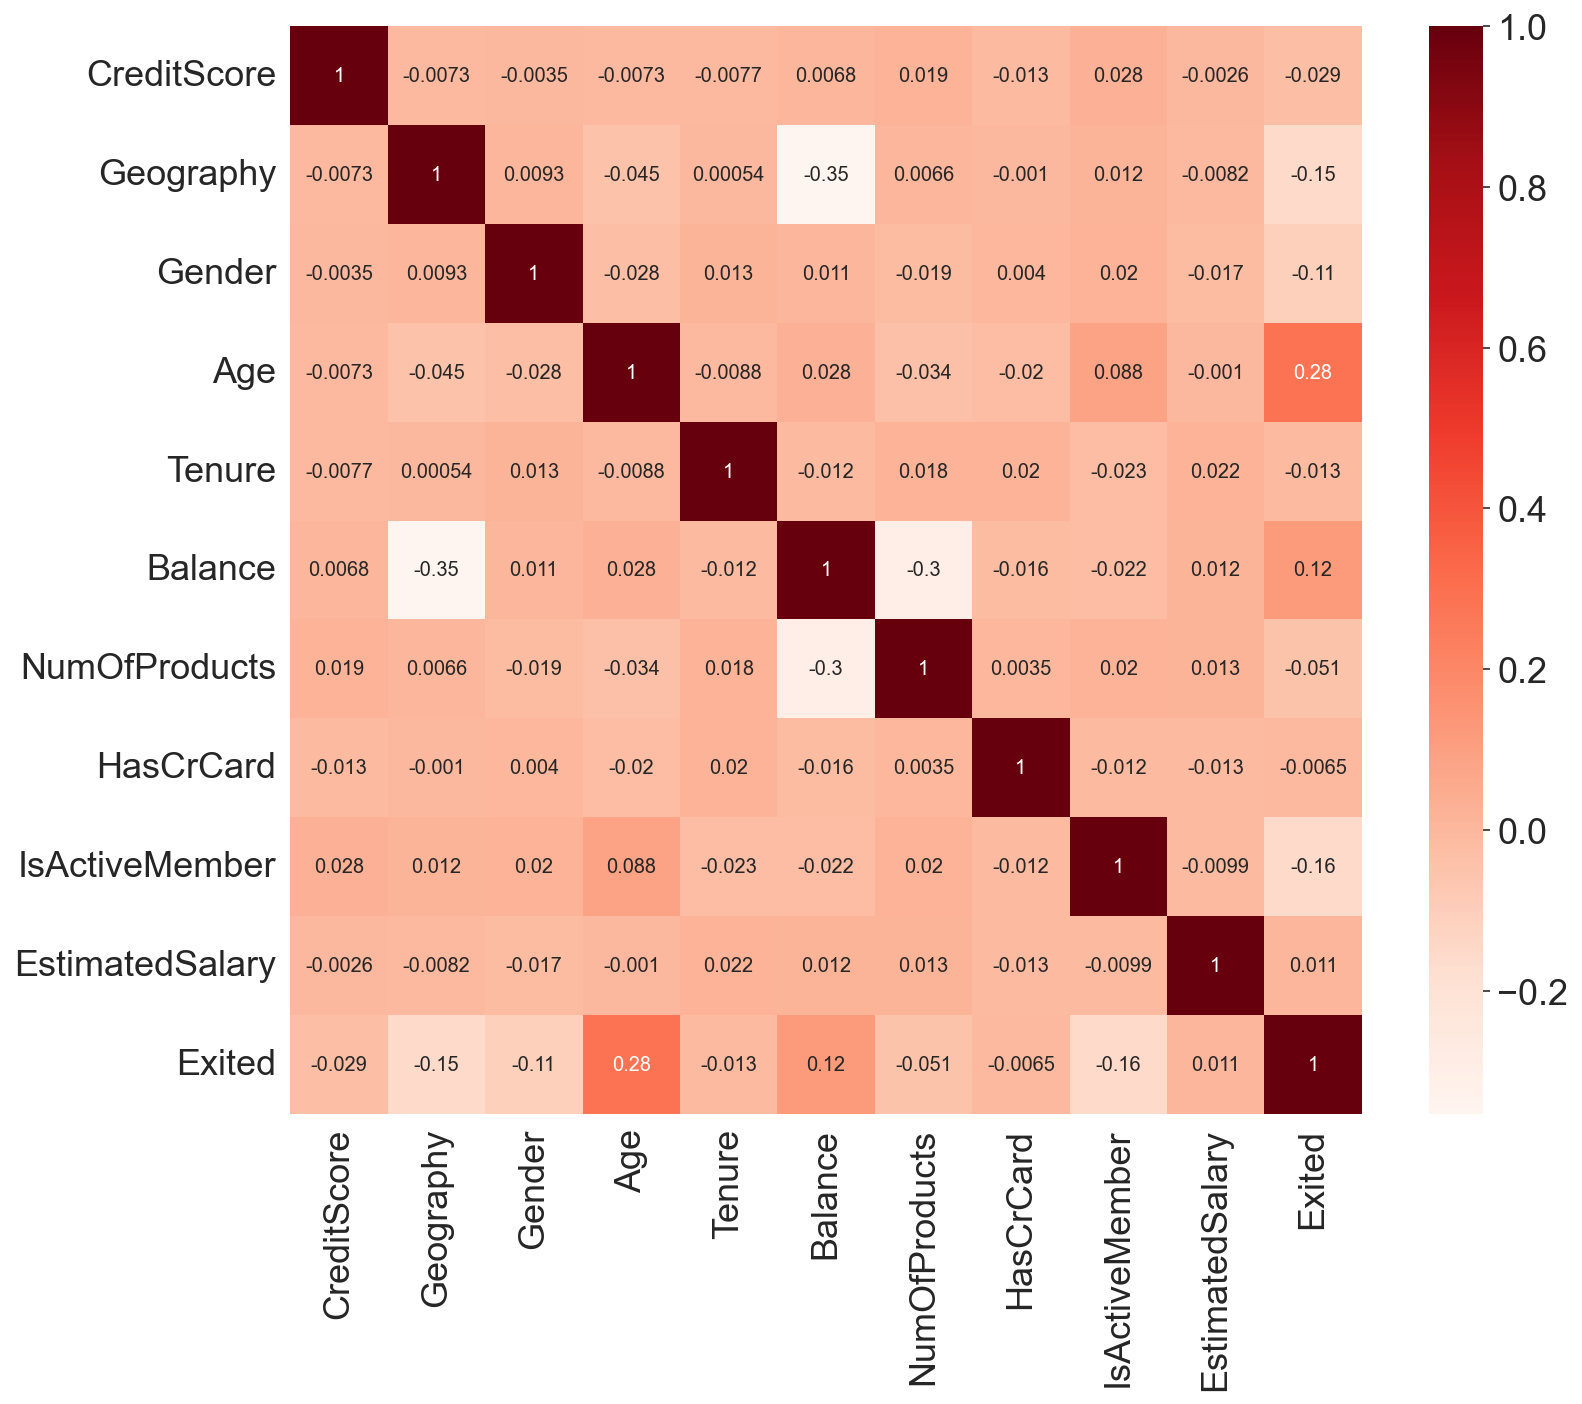

In [37]:
#Feature Selection
#filter based

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [38]:
#Correlation with output variable
#Feature Selection
#filter based
cor_target = abs(cor["Exited"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Geography         0.153
Gender            0.106
Age               0.283
Balance           0.118
IsActiveMember    0.157
Exited            1.000
Name: Exited, dtype: float64

In [1]:
#pip install mlxtend

In [39]:
#wrapper feature selection
#forward selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

y= y_train
full_data= X_train.copy()
full_data['Exited']= y



X = X_train
y = y_train

#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=6,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 6 features 
sfs.fit(X, y)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

feature_idx              cv_scores avg_score  \
1                (3,)  [0.12629363921783998]     0.126   
2              (3, 8)  [0.19519095199274095]     0.195   
3           (1, 3, 8)     [0.22822841607598]     0.228   
4        (1, 2, 3, 8)   [0.2526925270190171]     0.253   
5     (1, 2, 3, 6, 8)   [0.2625653880394574]     0.263   
6  (1, 2, 3, 5, 6, 8)   [0.2639554666828834]     0.264   

                                       feature_names  
1                                             (Age,)  
2                              (Age, IsActiveMember)  
3                   (Geography, Age, IsActiveMember)  
4           (Geography, Gender, Age, IsActiveMember)  
5  (Geography, Gender, Age, NumOfProducts, IsActi...  
6  (Geography, Gender, Age, Balance, NumOfProduct...

In [40]:
#wrapper feature selection
#backward elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

y= y_train
full_data= X_train.copy()
full_data['Exited']= y



X = X_train
y = y_train

#Build a logistic regression model 
model = LinearRegression()
#Define RFE 
#rfe = RFE(model,5)
rfe = RFE(estimator=model, n_features_to_select=6)
#Use RFE to select the top 5 features 
rfe.fit(X, y)

#Create a dataframe for the results 
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': full_data.columns[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

Feature_names  Selected  RFE_ranking
Columns                                        
0            CreditScore     False            3
1              Geography      True            1
2                 Gender      True            1
3                    Age      True            1
4                 Tenure     False            4
5                Balance     False            2
6          NumOfProducts      True            1
7              HasCrCard      True            1
8         IsActiveMember      True            1
9        EstimatedSalary     False            5

In [42]:
#embedded

from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold
X = X_train
y = y_train
skf = StratifiedKFold(n_splits=10)
lasso = LassoCV(cv=skf, random_state=42).fit(X, y)
print('Selected Features:', list(train_df.columns[np.where(lasso.coef_!=0)[0]]))

Selected Features: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [19]:
test_df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          596   Germany    Male   32       3   96709.07              2   
1          623    France    Male   43       1       0.00              2   
2          601     Spain  Female   44       4       0.00              2   
3          506   Germany    Male   59       8  119152.10              2   
4          560     Spain  Female   27       7  124995.98              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          0               0         41788.37       0  
1          1               1        146379.30       0  
2          1               0         58561.31       0  
3          1               1        170679.74       0  
4          1               1        114669.79       0

In [20]:
 
#encoding our categorical attributes

test_df['Gender'] = LabelEncoder().fit_transform(test_df['Gender'])

test_df['Geography'] = test_df['Geography'].map({
    'Germany': 1,
    'Spain': 2,
    'France': 3
})

print('✔️ Features Encoded!')

✔️ Features Encoded!


In [21]:
 #encoding our categorical attributes

test_df.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          596          1       1   32       3   96709.07              2   
1          623          3       1   43       1       0.00              2   
2          601          2       0   44       4       0.00              2   
3          506          1       1   59       8  119152.10              2   
4          560          2       0   27       7  124995.98              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          0               0         41788.37       0  
1          1               1        146379.30       0  
2          1               0         58561.31       0  
3          1               1        170679.74       0  
4          1               1        114669.79       0

In [22]:
scaler = StandardScaler()

scl_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure']
test_df[scl_columns] = scaler.fit_transform(test_df[scl_columns])

print('✔️ Features Scaled!')
test_df.head()

✔️ Features Scaled!


CreditScore  Geography  Gender    Age  Tenure  Balance  NumOfProducts  \
0       -0.513          1       1 -0.677  -0.698    0.301              2   
1       -0.236          3       1  0.384  -1.380   -1.256              2   
2       -0.461          2       0  0.481  -0.357   -1.256              2   
3       -1.434          1       1  1.928   1.006    0.662              2   
4       -0.881          2       0 -1.160   0.665    0.756              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          0               0           -0.991       0  
1          1               1            0.829       0  
2          1               0           -0.699       0  
3          1               1            1.252       0  
4          1               1            0.277       0

In [23]:
y_test = test_df['Exited']
X_test = test_df.drop('Exited', 1)

In [24]:


from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('GBC', GradientBoostingClassifier(random_state = 12345)))
models.append(('XGB', XGBClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

In [25]:
for name, model in models:
        import time
        start = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)
        end = time.time()
        print(end - start)

LR: (0.724500)
0.03893327713012695
KNN: (0.757000)
0.222367525100708
DT: (0.719000)
0.07883119583129883
RF: (0.821000)
1.5528407096862793
SVM: (0.791500)
5.462451457977295
GBC: (0.659500)
1.754319667816162
XGB: (0.307500)
1.0516853332519531
LightGBM: (0.445000)
0.22127962112426758
CatBoost: (0.426000)
6.472300052642822


In [26]:
#but our focus is on Recall score as minimizng the false negatives is critical here in this model.
# false negatives are the customers who are likely to be churned but they are not listed among predicted churned customers)
for name, model in models:
        import time
        start = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recall = recall_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, recall)
        print(msg)
        end = time.time()
        print(end - start)

LR: (0.659033)
0.03989052772521973
KNN: (0.681934)
0.22739338874816895
DT: (0.643766)
0.06785702705383301
RF: (0.651399)
1.573634386062622
SVM: (0.735369)
5.413566827774048
GBC: (0.872774)
1.7714014053344727
XGB: (0.982188)
1.0392200946807861
LightGBM: (0.949109)
0.19248485565185547
CatBoost: (0.966921)
6.251286268234253


In [27]:
models2 = []
models2.append(('DT', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('GBC', GradientBoostingClassifier( random_state = 12345)))
models2.append(('XGB', XGBClassifier( random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))
models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

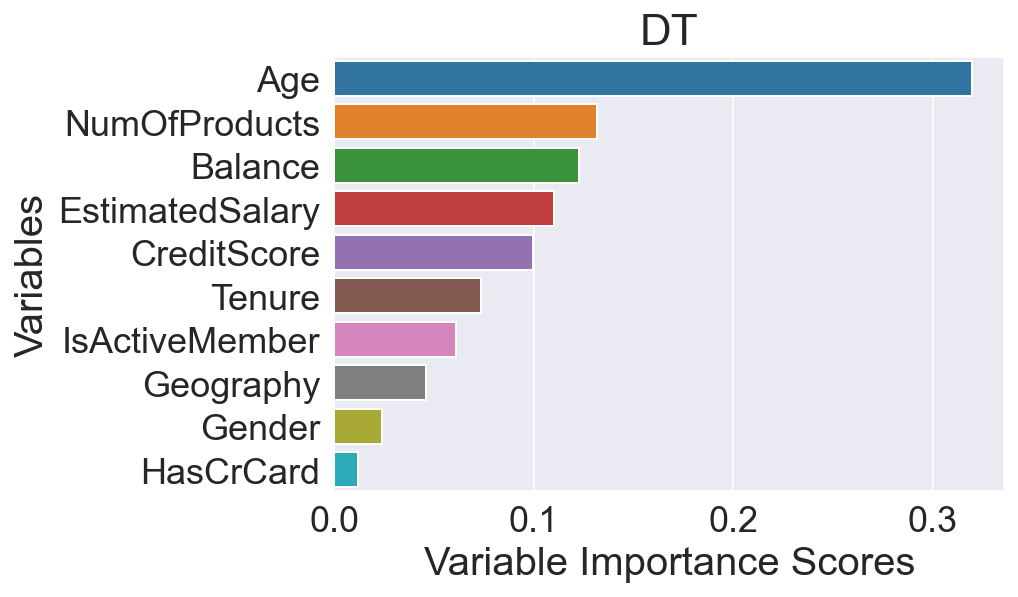

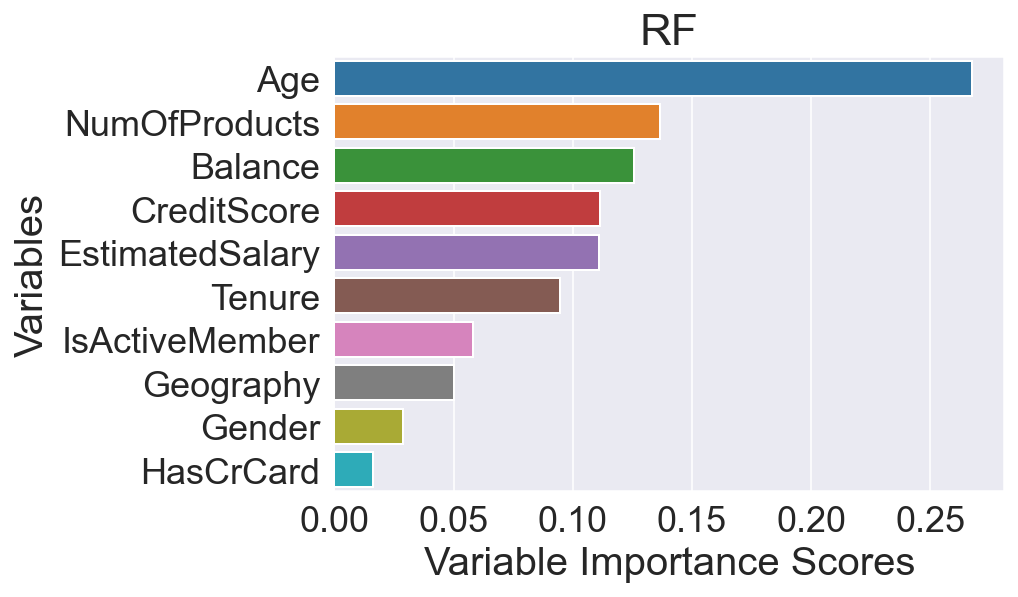

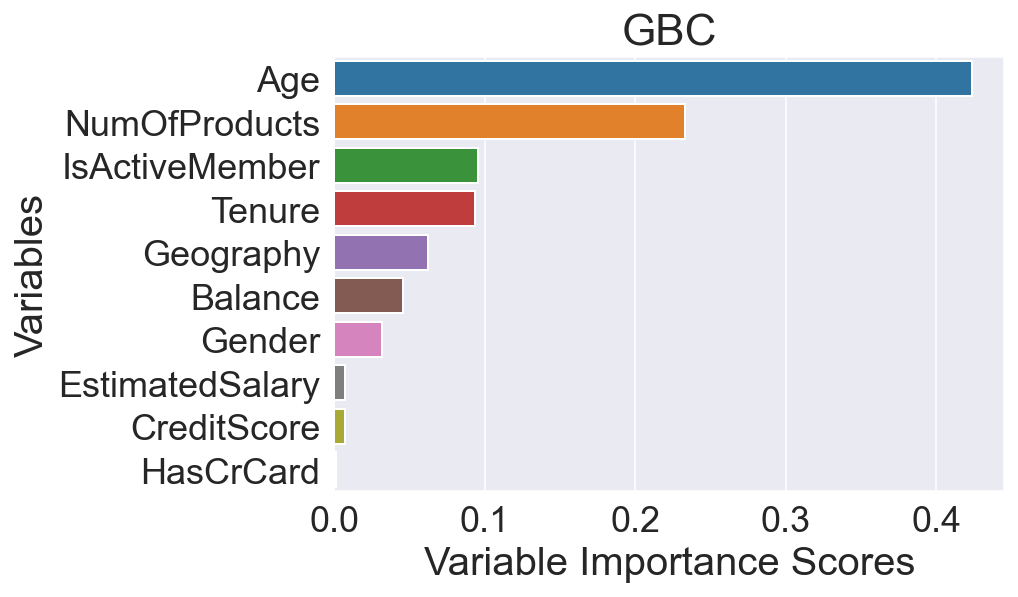

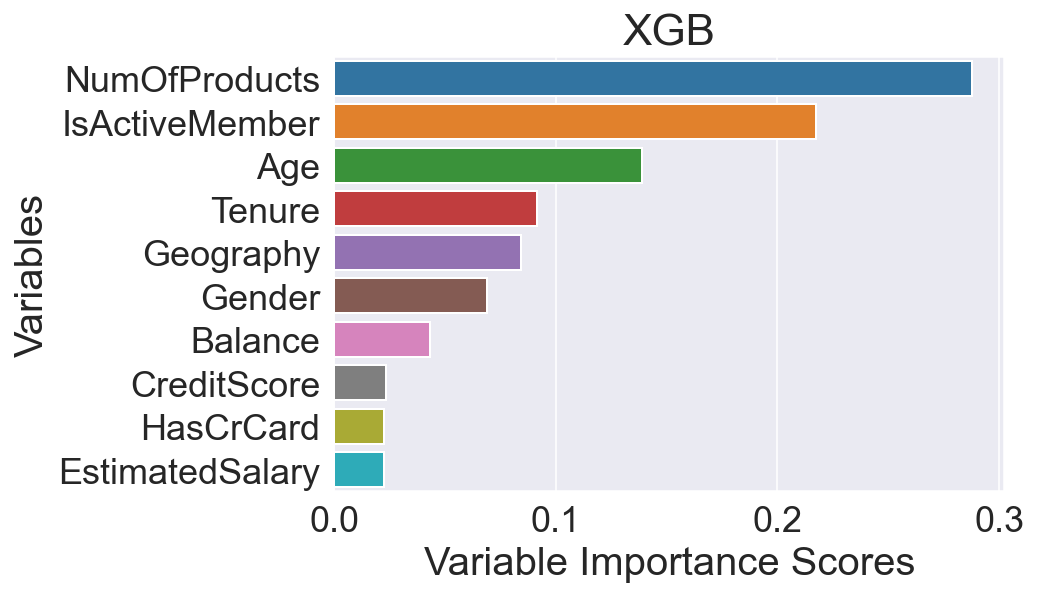

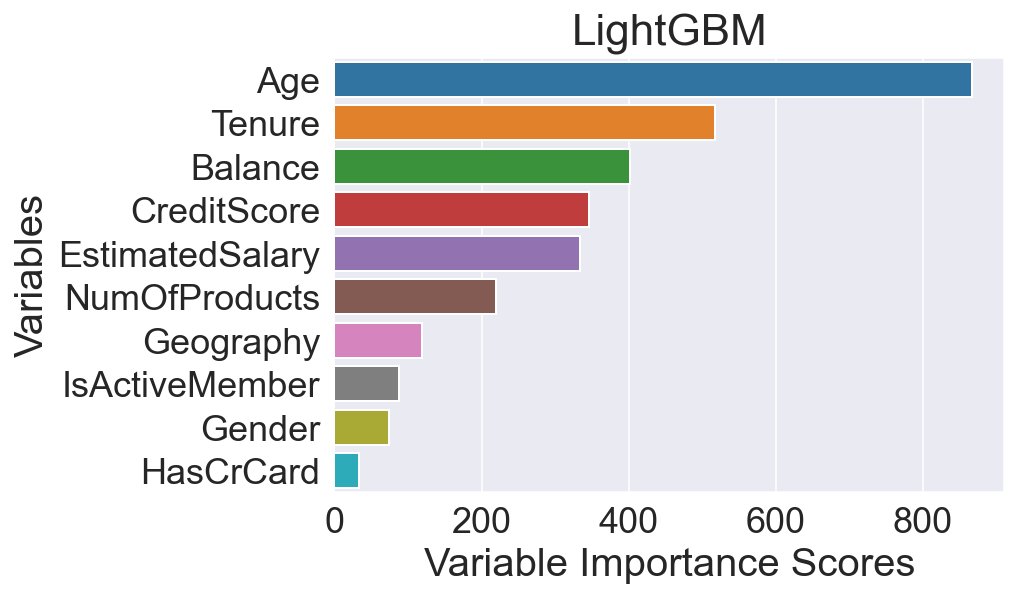

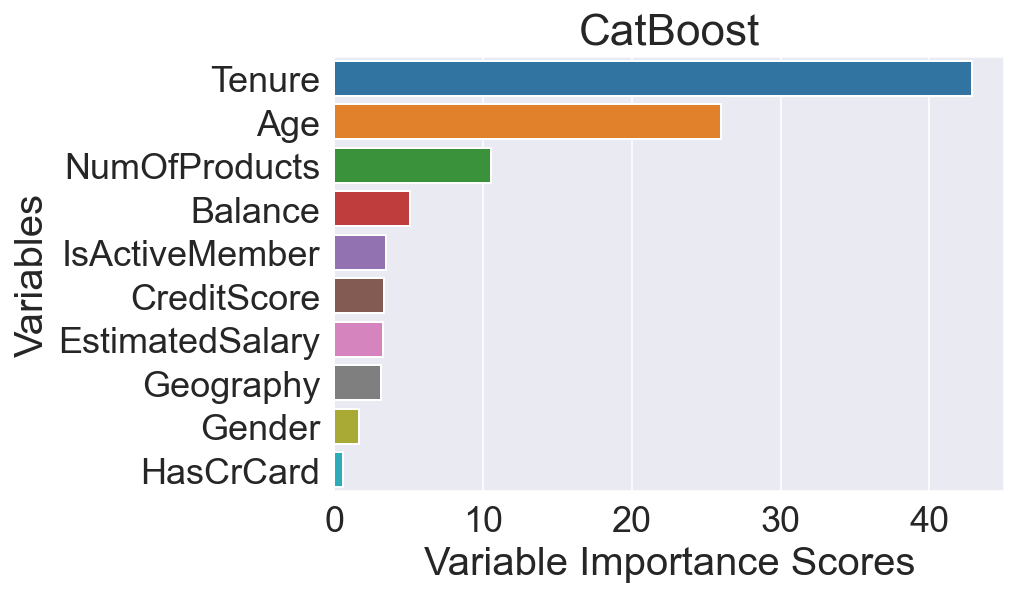

In [61]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Variable Importance Scores')
        plt.ylabel('Variables')
        plt.title(name)
        plt.show()

In [ ]:
#MODEL TUNING

In [ ]:
    #MODEL TUNING for GBC
    #Obtaining the Optimal Hyperparameters for the highest score models
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingClassifier
    GBC = GradientBoostingClassifier()
    parameters = {'learning_rate': [0.02,0.04,0.05,0.07],
                  'subsample'    : [0.9,0.8,0.7,0.6],
                  'n_estimators' : [100,500,800,1000],
                  'max_depth'    : [4,5,8,9]
                 }
    grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 2, n_jobs=-1)
    grid_GBC.fit(X_train, y_train)
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

In [ ]:
    #MODEL TUNING for XGB
    #Obtaining the Optimal Hyperparameters 
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import XGBClassifier
    XGB = XGBClassifier()
    parameters = {'learning_rate': [0.02,0.04,0.05,0.07],
                  'subsample'    : [0.9,0.8,0.7,0.6],
                  'n_estimators' : [100,500,800,1000],
                  'max_depth'    : [4,5,8,9]
                 }
    grid_XGB = GridSearchCV(estimator=XGB, param_grid = parameters, cv = 5, n_jobs=-1)
    grid_XGB.fit(X_train, y_train)
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)

In [ ]:
    #MODEL TUNING for LightGBM
    #Obtaining the Optimal Hyperparameters 
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import LGBMClassifier
    LightGBM = LGBMClassifier()
    parameters = {'learning_rate': [0.02,0.04,0.05,0.07],
                  'subsample'    : [0.9,0.8,0.7,0.6],
                  'n_estimators' : [100,500,800,1000],
                  'max_depth'    : [4,5,8,9]
                 }
    grid_LightGBM = GridSearchCV(estimator=LightGBM, param_grid = parameters, cv = 5, n_jobs=-1)
    grid_LightGBM.fit(X_train, y_train)
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_LightGBM.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_LightGBM.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_LightGBM.best_params_)

In [43]:
# Hyperparameters have previously been obtained with the help of GridSearchCV.

models = []
models.append(('GBC', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, n_estimators = 500, subsample = 0.8)))
models.append(('XGB', XGBClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        import time
        start = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recall = recall_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, recall)
        end = time.time()
        print(end - start)
        print(msg)


11.833403587341309
GBC: (0.982188)
[00:23:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


4.491948366165161
XGB: (0.982188)
0.5126285552978516
LightGBM: (0.984733)
26.14893889427185
CatBoost: (0.809160)
